# POSTTEST 8 PRAKTIKUM KECERDASAN BUATAN
### NAMA  : RISMAYANTI
### NIM    : 2109106025
### KELAS : A1-21

## Mengimport Library 

In [96]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

## Klasifikasi dengan Dataset Tensorflow (rock_paper_scissors)

In [98]:
(x_train_raw, y_train_raw),(x_test_raw, y_test_raw) = tfds.load("rock_paper_scissors", batch_size=-1, split=['train+test', 'train[:70%]+test'], as_supervised=True)

## Menampilkan Gambar Dataset

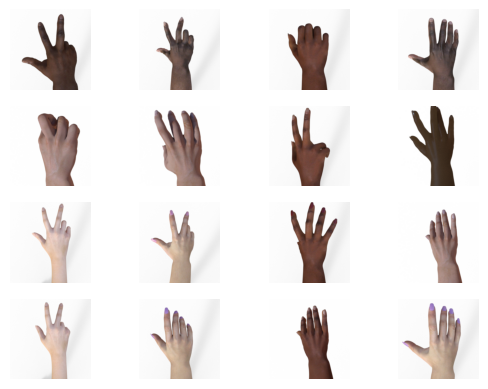

In [93]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

# Encoding Label pada Gambar dengan 3 Class

In [76]:
num_class = 3
y_train= tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_class)

## Menampilkan Shape Dataset

In [77]:
x_train_raw.shape

TensorShape([2892, 300, 300, 3])

In [78]:
x_test_raw.shape

TensorShape([2136, 300, 300, 3])

## Konversi 28x28 Jadi sebuah vektor berukuran 2352x1
### Gambar pada dataset ditentukan pikselnya menjadi 28x28 

In [79]:
training = tf.image.resize(x_train_raw, (28, 28))
testing = tf.image.resize(x_test_raw, (28, 28))

### Menentukan jumlah dimensi training dan testing 2D

In [ ]:
training = np.reshape(training.numpy(), (2892, 2352))
testing = np.reshape(testing.numpy(), (2136, 2352))

In [80]:
training = training.astype('float32')/255

In [81]:
testing = testing.astype('float32')/255

## Membuat Model DNN (DEEP NEURAL NETWORK)
### Terdiri dari 3 layer dan 2 aktivasi RELU

In [82]:
model = Sequential([
        Dense(512, activation = 'relu', input_dim = (2352)),
        Dense(256, activation = 'relu'),
        Dense(3, activation = 'softmax')
    ])

## Menampilkan Summary Model

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               1204736   
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1,336,835
Trainable params: 1,336,835
Non-trainable params: 0
_________________________________________________________________


##  Optimalisasi Model 

#### Optimizer yang dipilih sqd
#### Losss categorical_crossentropy karena data lebih dari 2
#### metrics accuracyy

In [84]:
model.compile(optimizer = 'sgd', 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

## Training pada Model dengan batch size 64 dan sebanyak epoch 30

In [ ]:
hist = model.fit(training, y_train, batch_size=64, epochs=30, validation_data=(testing, y_test))

Epoch 1/30
46/46 [==============================] - 1s 14ms/step - loss: 1.1358 - accuracy: 0.4602 - val_loss: 1.7155 - val_accuracy: 0.3305
Epoch 2/30
46/46 [==============================] - 0s 10ms/step - loss: 0.9627 - accuracy: 0.5474 - val_loss: 0.9907 - val_accuracy: 0.4054
Epoch 3/30
46/46 [==============================] - 1s 12ms/step - loss: 0.8836 - accuracy: 0.5858 - val_loss: 0.9437 - val_accuracy: 0.4565
Epoch 4/30
46/46 [==============================] - 1s 12ms/step - loss: 0.8071 - accuracy: 0.6470 - val_loss: 1.2507 - val_accuracy: 0.4148
Epoch 5/30
46/46 [==============================] - 1s 13ms/step - loss: 0.7688 - accuracy: 0.6791 - val_loss: 0.8276 - val_accuracy: 0.6400
Epoch 6/30
46/46 [==============================] - 1s 12ms/step - loss: 0.7081 - accuracy: 0.7064 - val_loss: 1.2837 - val_accuracy: 0.4082
Epoch 7/30
46/46 [==============================] - 1s 11ms/step - loss: 0.6517 - accuracy: 0.7559 - val_loss: 1.0270 - val_accuracy: 0.5290
Epoch 8/30
46

## Evaluasi Data setelah Training
#### Accuracy dan Validasi menunjukkan hasil yang cocok tidak overfitting/ underfitting

In [89]:
score = model.evaluate(testing, y_test)
print("TEST LOSS           : ", score [0])
print("TEST ACCURACY       : ", score [1])
print("VALIDATION LOSS     : ", hist.history['val_loss'][-1])
print("VALIDATION ACCURACY : ", hist.history['val_accuracy'][-1])

67/67 [==============================] - 0s 4ms/step - loss: 0.2143 - accuracy: 0.9176
TEST LOSS           :  0.21425184607505798
TEST ACCURACY       :  0.9176030158996582
VALIDATION LOSS     :  0.21425184607505798
VALIDATION ACCURACY :  0.9176030158996582


## Perbandingan Loss dan Validasi Loss

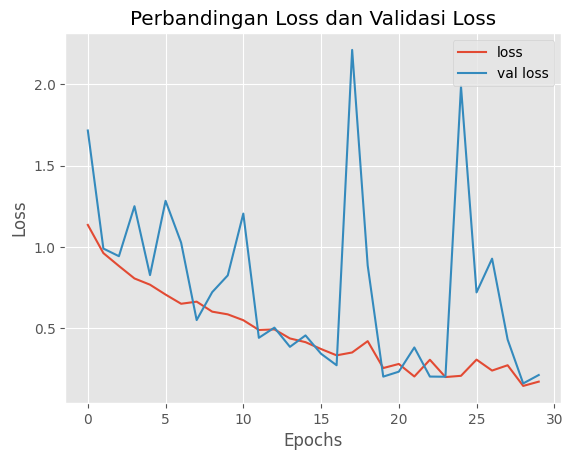

In [101]:
plt.style.use('ggplot')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title("Perbandingan Loss dan Validasi Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Perbandingan Accuracy dan Vlidasi Accuracy

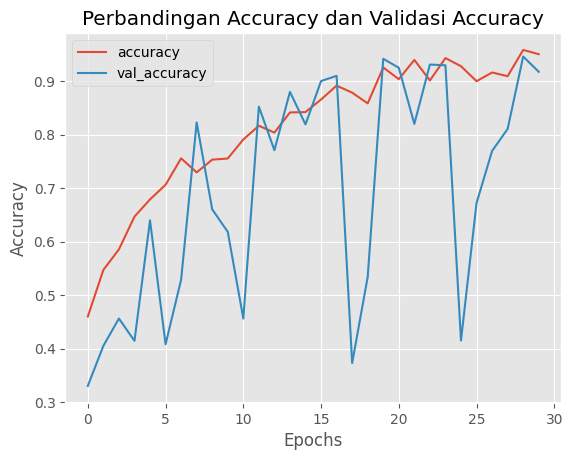

In [100]:
plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.title("Perbandingan Accuracy dan Validasi Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()